# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [50]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
# Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
# Create endpoint URL with each city
    city_url = query_url + city.replace(" ","+")
# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

# Add 1 to the record count
    record_count += 1

    try:
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass           
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | tuatapere
Processing Record 3 of Set 1 | bosaso
Processing Record 4 of Set 1 | kawana waters
City not found. Skipping...
Processing Record 5 of Set 1 | neuquen
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | yulara
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | magadan
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | milkovo
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kapoeta
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | xuddur
Processing Record 21 of Set 1 | wilmington
Processing Record 22 

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64


In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,81.05,75,65,6.91,KI,2023-04-02 15:26:47
1,tuatapere,-46.1333,167.6833,46.98,83,94,4.09,NZ,2023-04-02 15:26:47
2,bosaso,11.2842,49.1816,83.89,70,54,4.79,SO,2023-04-02 15:26:47
3,neuquen,-38.9516,-68.0591,69.69,30,0,11.50,AR,2023-04-02 15:22:02
4,hithadhoo,-0.6000,73.0833,82.71,71,9,7.67,MV,2023-04-02 15:26:47


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv(output, index_label="City_ID")
# Read & Display the saved data
city_data_df = pd.read_csv(output, index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,81.05,75,65,6.91,KI,2023-04-02 15:26:47
1,tuatapere,-46.1333,167.6833,46.98,83,94,4.09,NZ,2023-04-02 15:26:47
2,bosaso,11.2842,49.1816,83.89,70,54,4.79,SO,2023-04-02 15:26:47
3,neuquen,-38.9516,-68.0591,69.69,30,0,11.50,AR,2023-04-02 15:22:02
4,hithadhoo,-0.6000,73.0833,82.71,71,9,7.67,MV,2023-04-02 15:26:47


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

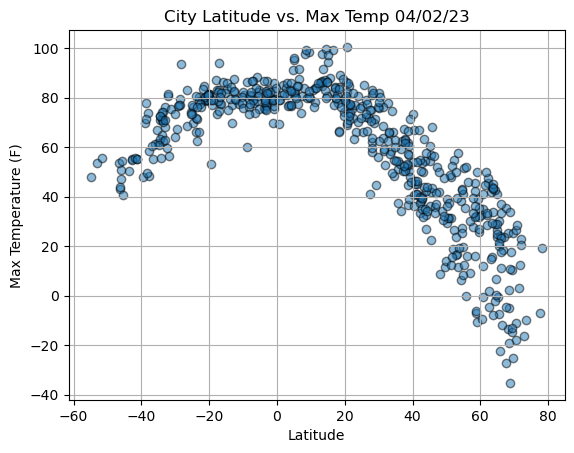

In [54]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#CREATE SHOW AND SAVE THE PLOT
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

plt.title(f"City Latitude vs. Max Temp "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

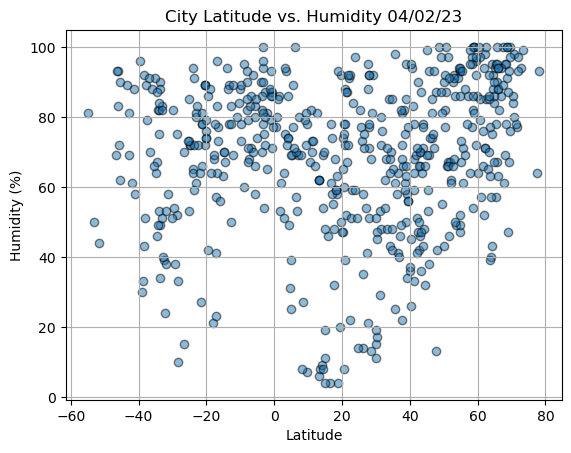

In [55]:
#CREATE SHOW AND SAVE THE PLOT
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

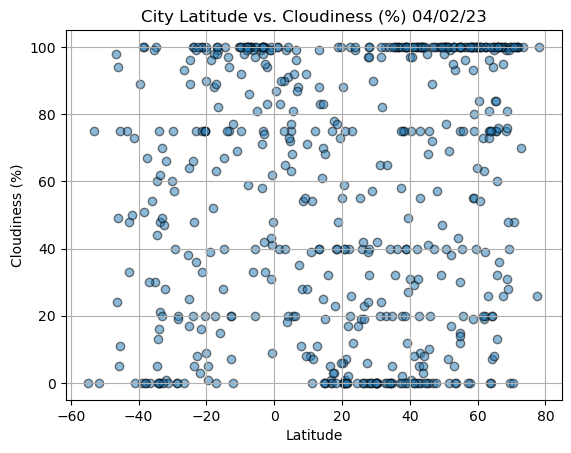

In [56]:
#CREATE SHOW AND SAVE THE PLOT
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

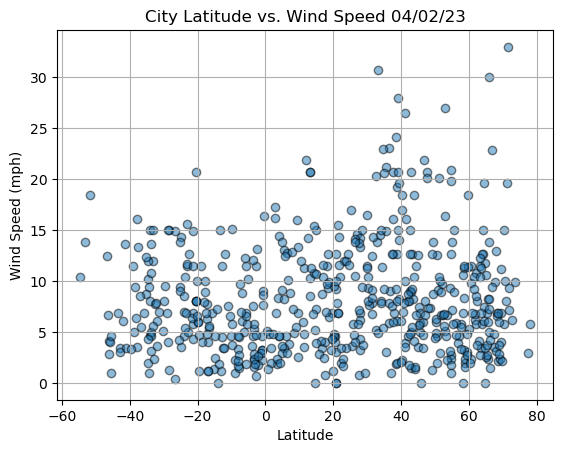

In [57]:
#CREATE SHOW AND SAVE THE PLOT
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.5, label="Cities")
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def plot_lg(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,81.05,75,65,6.91,KI,2023-04-02 15:26:47
2,bosaso,11.2842,49.1816,83.89,70,54,4.79,SO,2023-04-02 15:26:47
8,magadan,59.5667,150.8000,25.88,96,100,3.02,RU,2023-04-02 15:26:48
9,chokurdakh,70.6333,147.9167,-17.88,98,48,10.02,RU,2023-04-02 15:26:48
11,cherskiy,68.7500,161.3000,-35.23,100,31,2.17,RU,2023-04-02 15:26:48


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tuatapere,-46.1333,167.6833,46.98,83,94,4.09,NZ,2023-04-02 15:26:47
3,neuquen,-38.9516,-68.0591,69.69,30,0,11.50,AR,2023-04-02 15:22:02
4,hithadhoo,-0.6000,73.0833,82.71,71,9,7.67,MV,2023-04-02 15:26:47
5,yulara,-25.2406,130.9889,74.07,53,25,9.42,AU,2023-04-02 15:26:47
6,saint-pierre,-21.3393,55.4781,80.28,78,100,5.75,RE,2023-04-02 15:26:47


###  Temperature vs. Latitude Linear Regression Plot

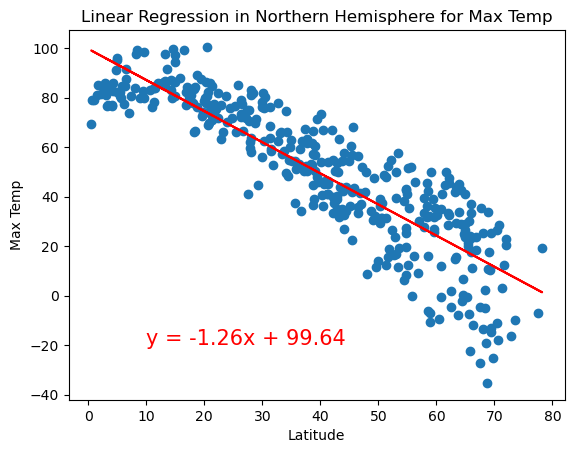

In [74]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_lg(x_values, y_values,'Linear Regression in Northern Hemisphere for Max Temp', 'Max Temp',(10,-20))


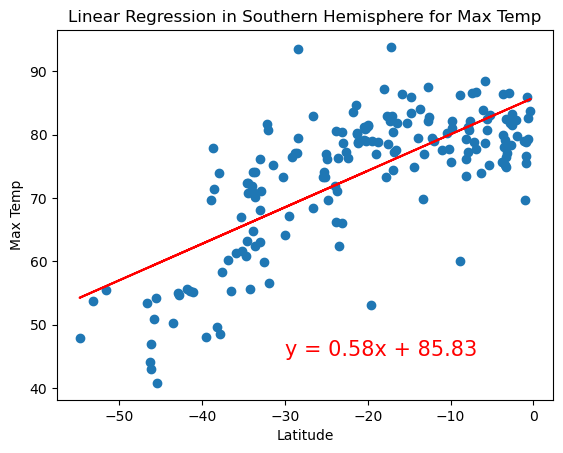

In [76]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_lg(x_values, y_values,'Linear Regression in Southern Hemisphere for Max Temp', 'Max Temp',(-30,45))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

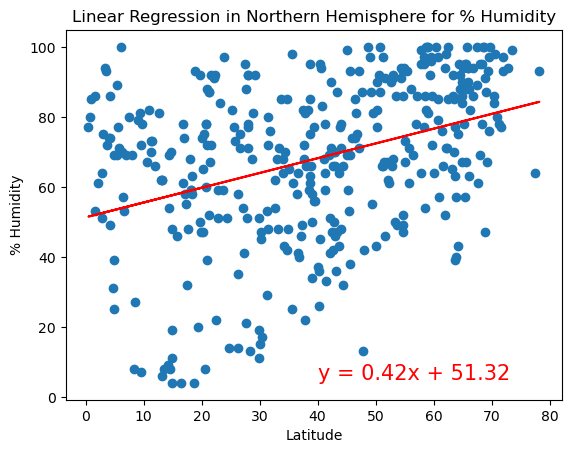

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,'Linear Regression in Northern Hemisphere for % Humidity', '% Humidity',(40,5))

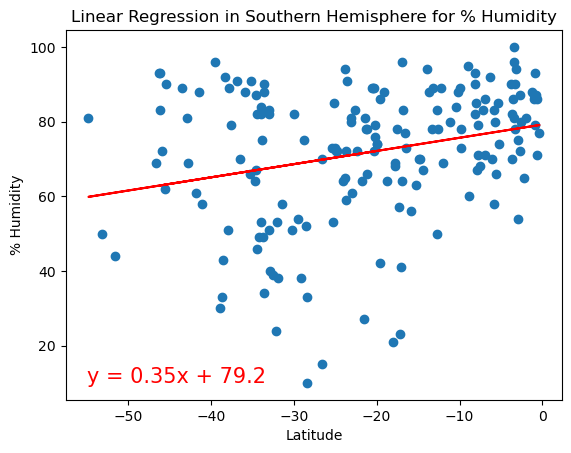

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,'Linear Regression in Southern Hemisphere for % Humidity', '% Humidity', (-55,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

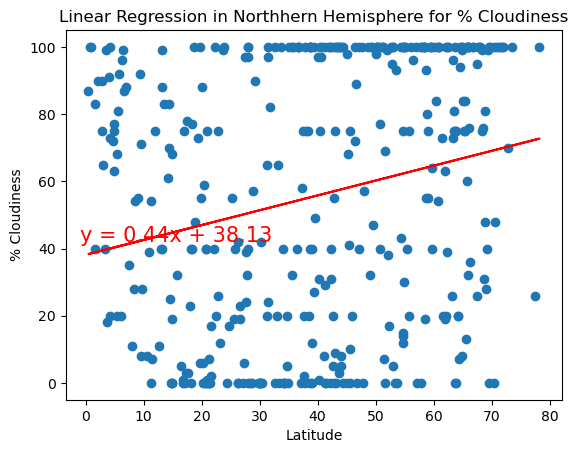

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression in Northhern Hemisphere for % Cloudiness', '% Cloudiness',(-1,42))

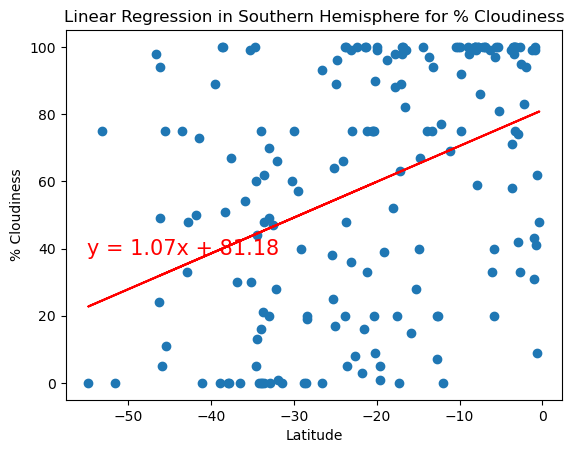

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression in Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,38))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

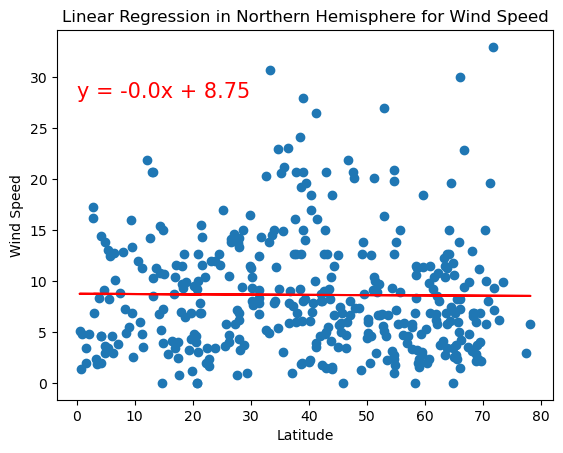

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,'Linear Regression in Northern Hemisphere for Wind Speed', 'Wind Speed',(0,28))


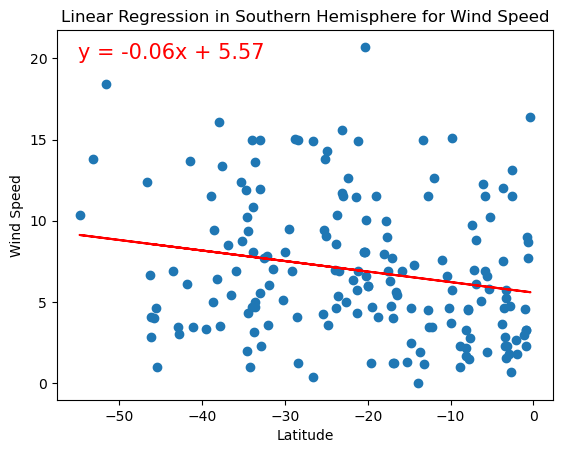

In [86]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,'Linear Regression in Southern Hemisphere for Wind Speed', 'Wind Speed',(-55,20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#DATA ANALYSIS FOR BOTH HEMISPHRES ARE LISTED UNDER THE REPORT TYPE
#---Temperature vs. Latitude---
###There is a direct correlation between higher latitude and weather temperature.  As expected temperatures rise as negative latitudes get closer to 0 and colder as the latitude continues to get higher

#---Humidity vs. Latitude---
###There is no direct correlation between latitude and humidity in either hemisphere, which indicates that humidity is independent of latitude however, data in the southern hemisphere is less populated in my data but still existent

#---Cloudiness vs. Latitude---
###There is no correlation between clouds and latitude at all in eitehr hemisphere.

#---Wind Speed vs. Latitude---
###There is no direct correlation between latitude and wind speed in either hemisphere, which indicates that wind speed is independent of latitude however, data in the southern hemisphere is less populated in my data but still existent